# eBird data analsis

[Jim Tyhurst](https://jimtyhurst.com)

Data was obtained from Craig Fisk on 2024-12-05.
He has been recording his bird sightings on
[ebird.org](https://ebird.org)
for several years. He requested an export of his data from their
website, which resulted in a CSV file.
This notebook does some exploratory data analysis (EDA) of that file.

## MIT License

Copyright (c) 2024 Jim Tyhurst

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

## Specify the path to the data file.

In [1]:
# Local path in the project.
from pathlib import Path

DATA_FILE_PATH = Path("..") / "data" / "raw" / "MyEBirdData.csv"

If running on Google Colab, uncomment the code in the following cell, in order to
mount the dataset for easy access from 'My Drive'.

_Note_: Due to colabtools issue #4343 (https://github.com/googlecolab/colabtools/issues/4343),
you need to enable _all_ 8 permissions, in order to access your drive.
So choose 'Select all' when prompted to enable access to your MyDrive.

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# DATA_FILE_PATH = '/content/drive/My Drive/Colab Notebooks/your-path-to-data-file.csv'

In [3]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [4]:
df = pl.read_csv(
    DATA_FILE_PATH,
    null_values=["X"],
    truncate_ragged_lines=True,
)
original_row_count = df.shape[0]
df.shape

(10995, 23)

In [5]:
# Removes null counts.
# Sorts in reverse chronological order.
df = (
    df.filter(pl.col("Count").is_not_null())
    .filter(pl.col("Count").gt(0))
    .sort(by=["Date", "Time", "Count", "Common Name"], descending=[True, True, True, False])
)
non_null_row_count = df.shape[0]
print(f"Removed {original_row_count - non_null_row_count} rows with null values.")
df.shape

Removed 10 rows with null values.


(10985, 23)

In [6]:
df.head()

Submission ID,Common Name,Scientific Name,Taxonomic Order,Count,State/Province,County,Location ID,Location,Latitude,Longitude,Date,Time,Protocol,Duration (Min),All Obs Reported,Distance Traveled (km),Area Covered (ha),Number of Observers,Breeding Code,Observation Details,Checklist Comments,ML Catalog Numbers
str,str,str,i64,i64,str,str,str,str,f64,f64,str,str,str,i64,i64,f64,str,i64,str,str,str,str
"""S203821028""","""Dark-eyed Junco""","""Junco hyemalis""",32842,24,"""US-NJ""","""Somerset""","""L28558215""","""Southard Park""",40.710548,-74.542139,"""2024-11-27""","""08:30 AM""","""eBird - Traveling Count""",120,1,9.656,null,1,null,null,"""Most sightings were along Manc…",null
"""S203821028""","""European Starling""","""Sturnus vulgaris""",27571,18,"""US-NJ""","""Somerset""","""L28558215""","""Southard Park""",40.710548,-74.542139,"""2024-11-27""","""08:30 AM""","""eBird - Traveling Count""",120,1,9.656,null,1,null,null,"""Most sightings were along Manc…",null
"""S203821028""","""House Sparrow""","""Passer domesticus""",31261,8,"""US-NJ""","""Somerset""","""L28558215""","""Southard Park""",40.710548,-74.542139,"""2024-11-27""","""08:30 AM""","""eBird - Traveling Count""",120,1,9.656,null,1,null,null,"""Most sightings were along Manc…",null
"""S203821028""","""Canada Goose""","""Branta canadensis""",330,6,"""US-NJ""","""Somerset""","""L28558215""","""Southard Park""",40.710548,-74.542139,"""2024-11-27""","""08:30 AM""","""eBird - Traveling Count""",120,1,9.656,null,1,null,null,"""Most sightings were along Manc…",null
"""S203821028""","""Cedar Waxwing""","""Bombycilla cedrorum""",29618,6,"""US-NJ""","""Somerset""","""L28558215""","""Southard Park""",40.710548,-74.542139,"""2024-11-27""","""08:30 AM""","""eBird - Traveling Count""",120,1,9.656,null,1,null,null,"""Most sightings were along Manc…",null


## Exploratory Data Analysis (EDA)

In [7]:
start_date = df["Date"].min()
end_date = df["Date"].max()
print(f"This data has bird sightings from {start_date} to {end_date}")

This data has bird sightings from 2018-09-23 to 2024-11-27


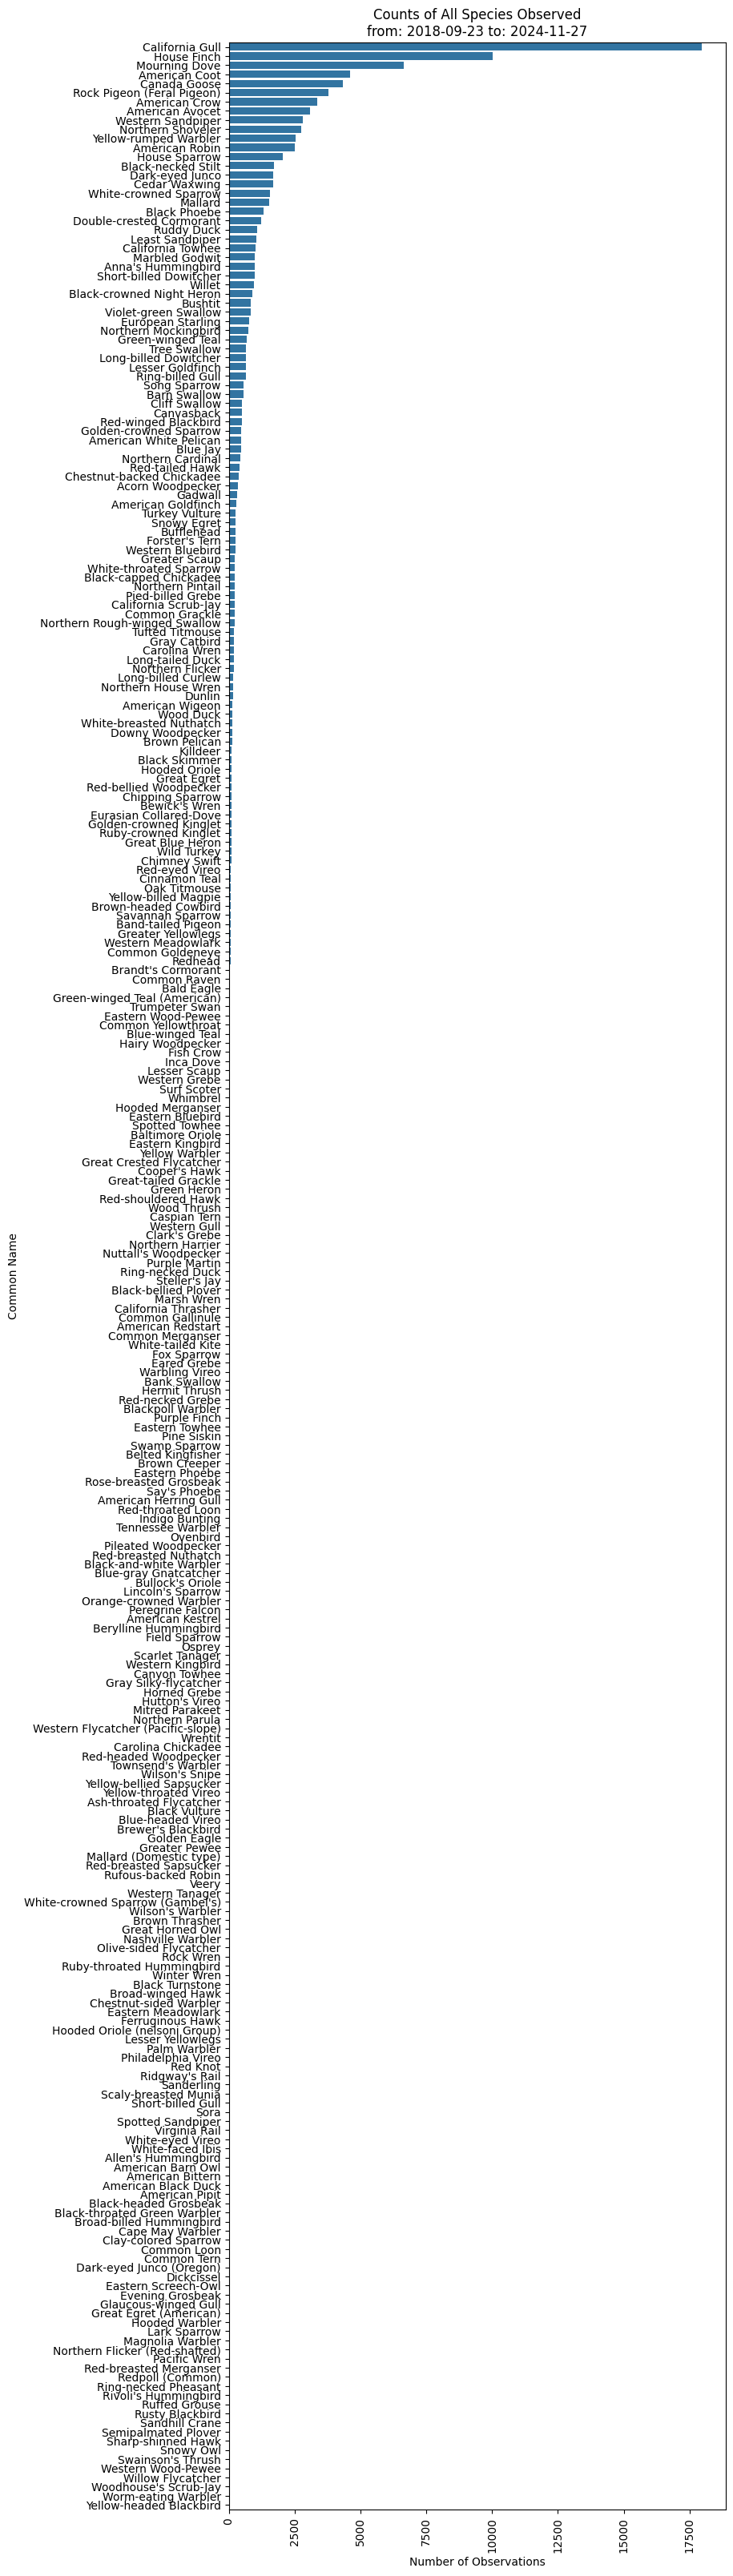

In [8]:
# Plots total counts for every species.
species_count = (
    df.select(["Common Name", "Count"])
    .group_by("Common Name")
    .agg(pl.col("Count").sum().alias("Number of Observations"))
    .sort(by=["Number of Observations", "Common Name"], descending=[True, False])
)

plt.figure(figsize=(8, 40))
sns.barplot(x="Number of Observations", y="Common Name", data=species_count, errorbar=None)
plt.title(f"Counts of All Species Observed\nfrom: {start_date} to: {end_date}")
plt.xticks(rotation=90)
plt.show()

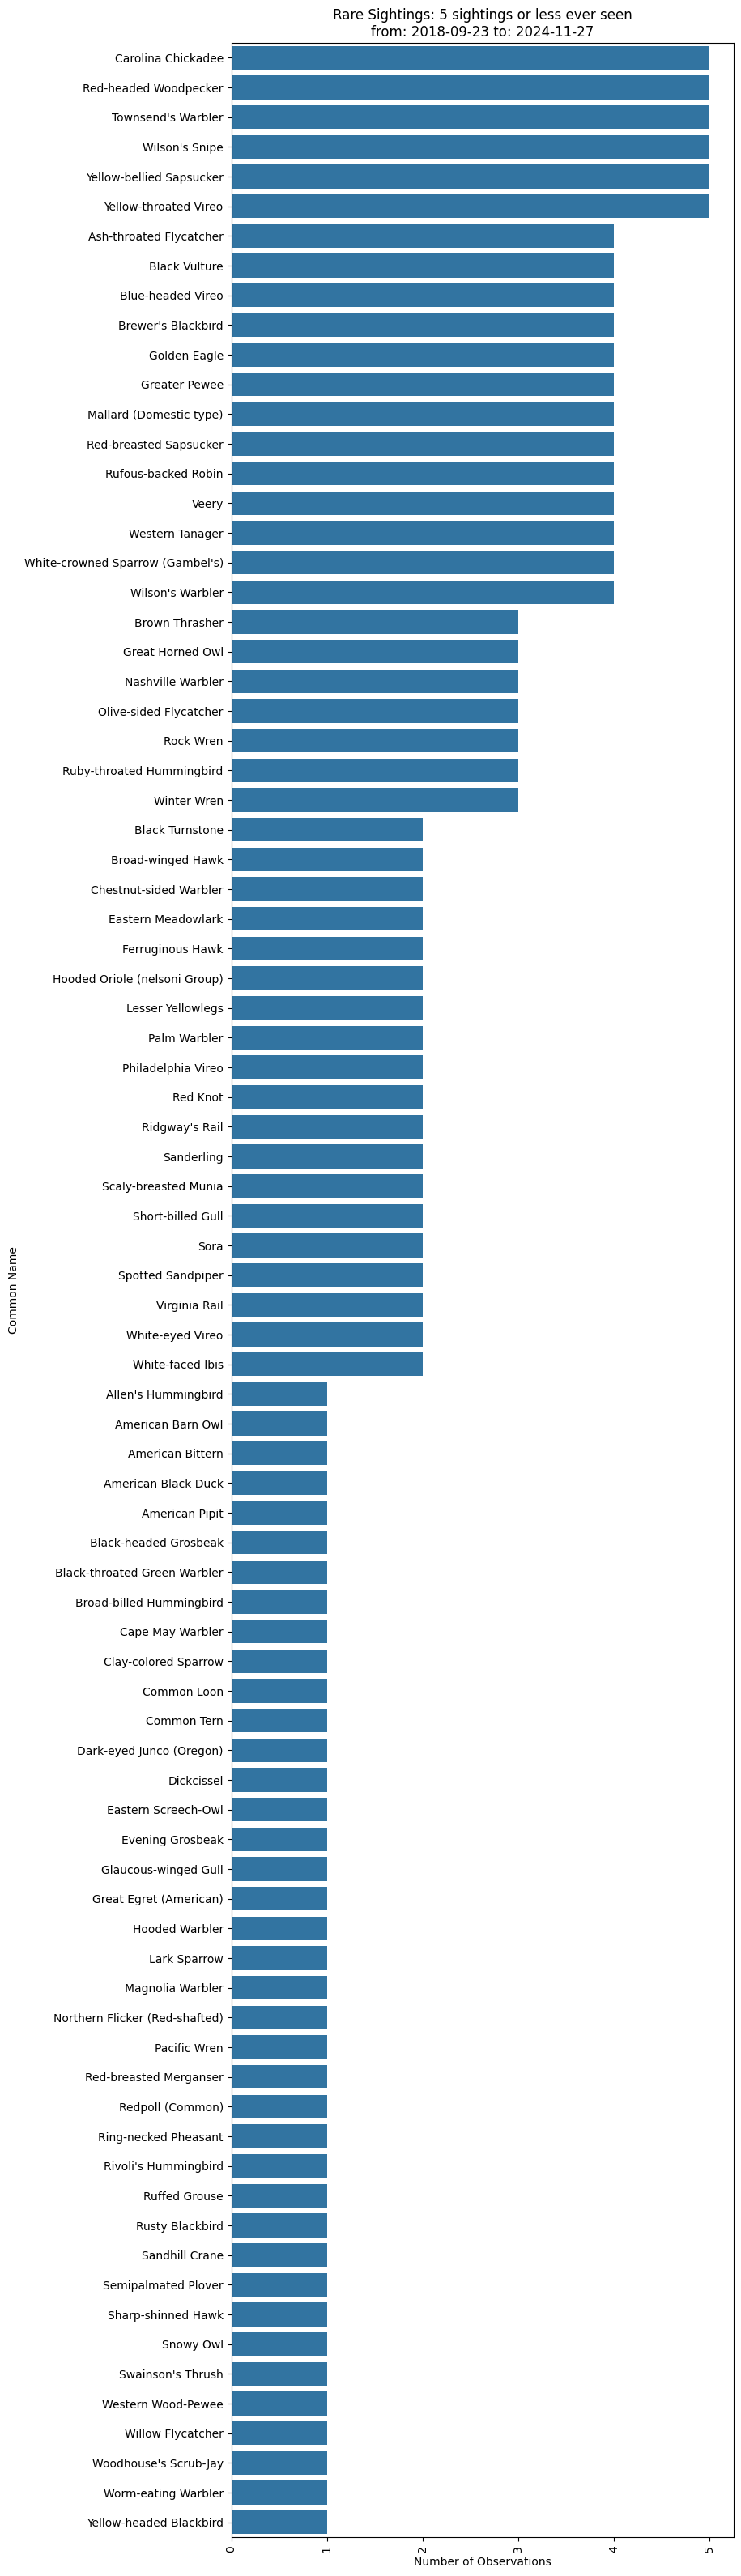

In [9]:
# Plots total counts for rare sightings,
# i.e. RARE_SIGHTINGS_UPPER_LIMIT number of sightings or less ever seen.
RARE_SIGHTINGS_UPPER_LIMIT = 5
species_count = (
    df.select(["Common Name", "Count"])
    .group_by("Common Name")
    .agg(pl.col("Count").sum().alias("Number of Observations"))
    .filter(pl.col("Number of Observations").le(RARE_SIGHTINGS_UPPER_LIMIT))
    .sort(by=["Number of Observations", "Common Name"], descending=[True, False])
)
plt.figure(figsize=(8, 40))
sns.barplot(x="Number of Observations", y="Common Name", data=species_count, errorbar=None)
plt.title(
    f"Rare Sightings: {RARE_SIGHTINGS_UPPER_LIMIT} sightings or less ever seen\nfrom: {start_date} to: {end_date}"
)
plt.xticks(rotation=90)
plt.show()